# Problem 1

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from matplotlib.pylab import rcParams
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sc
import math
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

The dataset faces.mat contains a dataset of images, each $32\times 32$ in grayscale. We will perform PCA on this dataset.

1. Load the data use scipy.io.loadmat. Get the feature matrix. Each row of the feature matrix is an image. Plot the first 100 images, using subplot to make a 10 by 10 image matrix. Do you see some familiar faces? (Hint: recall how we plot images for the MNIST dataset. Use cmap=mpl.cm.gist_gray. If you see the image is rotated, set the "order" variable when you reshape the data. Also make the figure bigger if needed use rcParams as we did before.) 

2. Scale the feature matrix first. Perform a PCA for the scaled feature matrix to get all of the principal components. Plot the first 36 principal components in a 6 by 6 image matrix.

3. To have $95\%$ of the variance explained, what is the minimum number of principal components that are needed?

4. Build a PCA with 100 principal components. Project the data to the 100 principal components and perform an inverse transform back to the original dimension. Plot the first 100 images (10 by 10 image matrix) using the scaled feature matrix, and then plot the first 100 images using the recovered data. What do you see?

In [2]:
# Import the Data
data = sc.io.loadmat('faces.mat')

# Create the feature Matrix
X_feature = data['X']

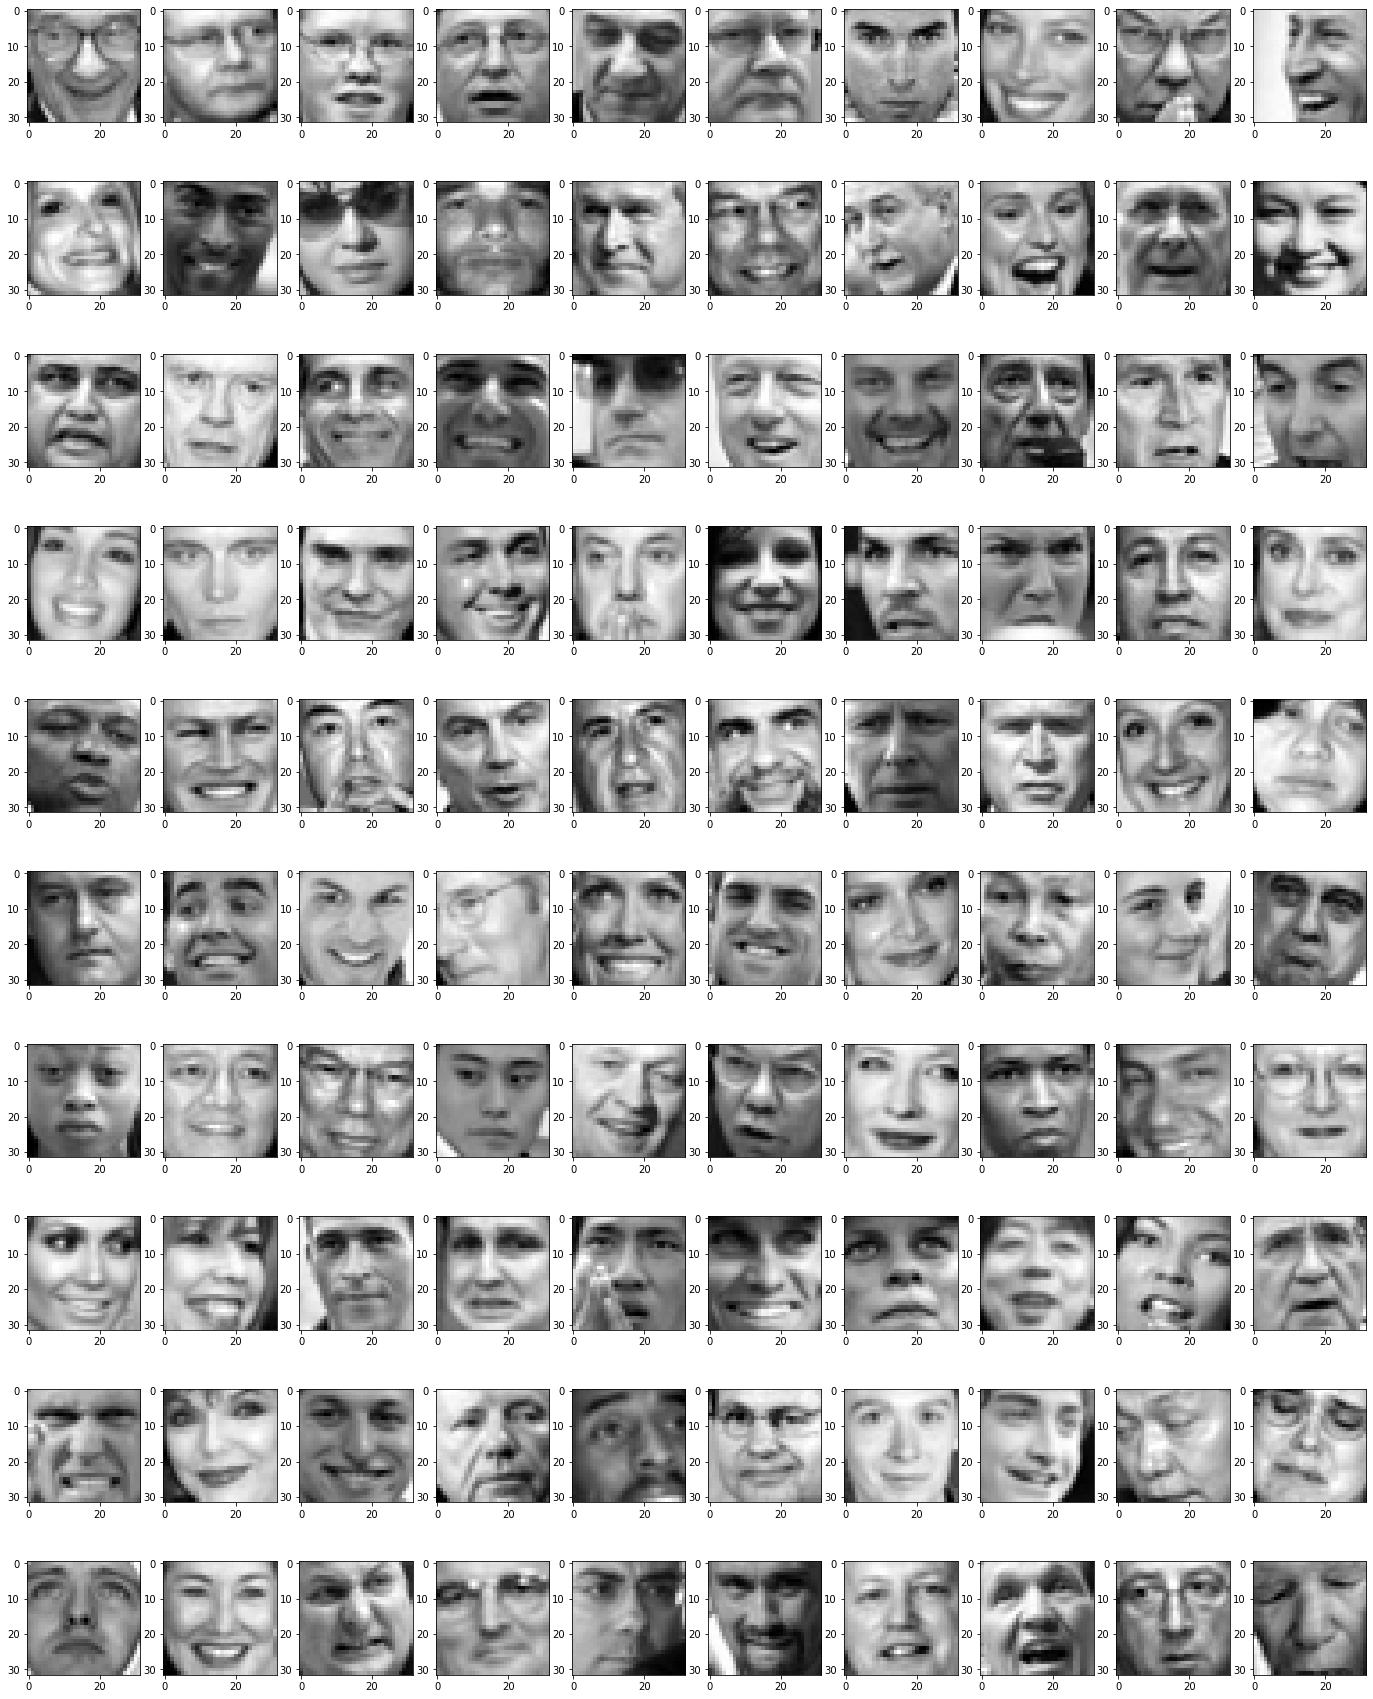

In [3]:
# Now we will plot the first 100 images

plt.figure(figsize=(1 * 24, 1.3 * 24))
for i in range(len(X_feature[:100])):
    plt.subplot(10, 10, i+1)
    image = X_feature[i].reshape((32,32), order = 'F')
    plt.imshow(image, cmap = mpl.cm.gist_gray);

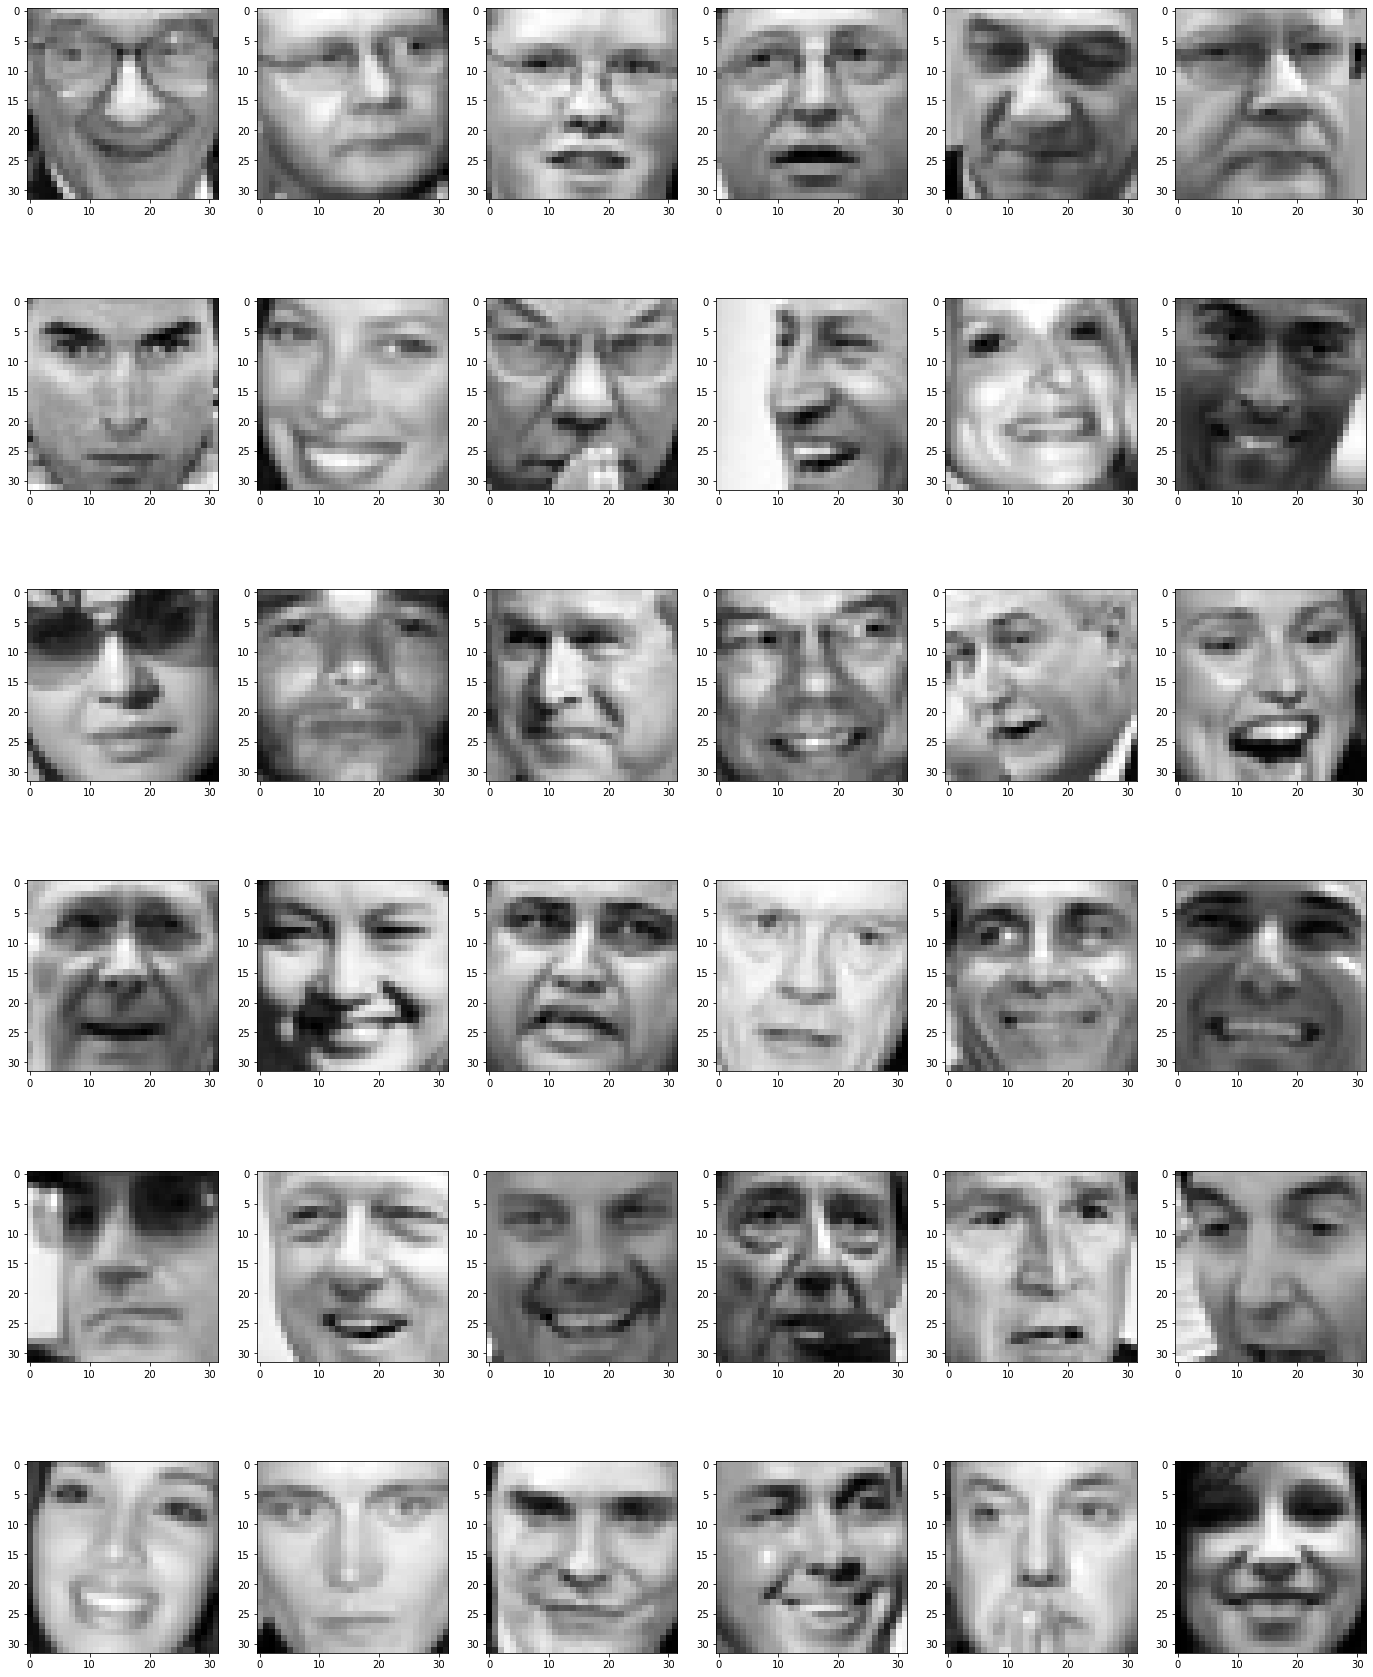

In [4]:
#2

# Now we will scale the feature matrix

scaler = StandardScaler()
X_scaled=scaler.fit_transform(X_feature)

# Now we will perform a PCA for the scaled matrix to 
# obtain all of the principal components 

pca = PCA()
transform_X = pca.fit(X_scaled)

plt.figure(figsize=(1 * 24, 1.3 * 24))
for i in range(len(X_feature[:36])):
    plt.subplot(6, 6, i+1)
    image = X_feature[i].reshape((32,32), order = 'F')
    plt.imshow(image, cmap = mpl.cm.gist_gray);

In [5]:
#3

pca.fit(X_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
argmax = np.argmax(cumsum >= 0.95) + 1
print('The minimum number of principal components that are needed  to have 95% of the variance explained is as follows', argmax, '.')

The minimum number of principal components that are needed  to have 95% of the variance explained is as follows 130 .


Scaled Images


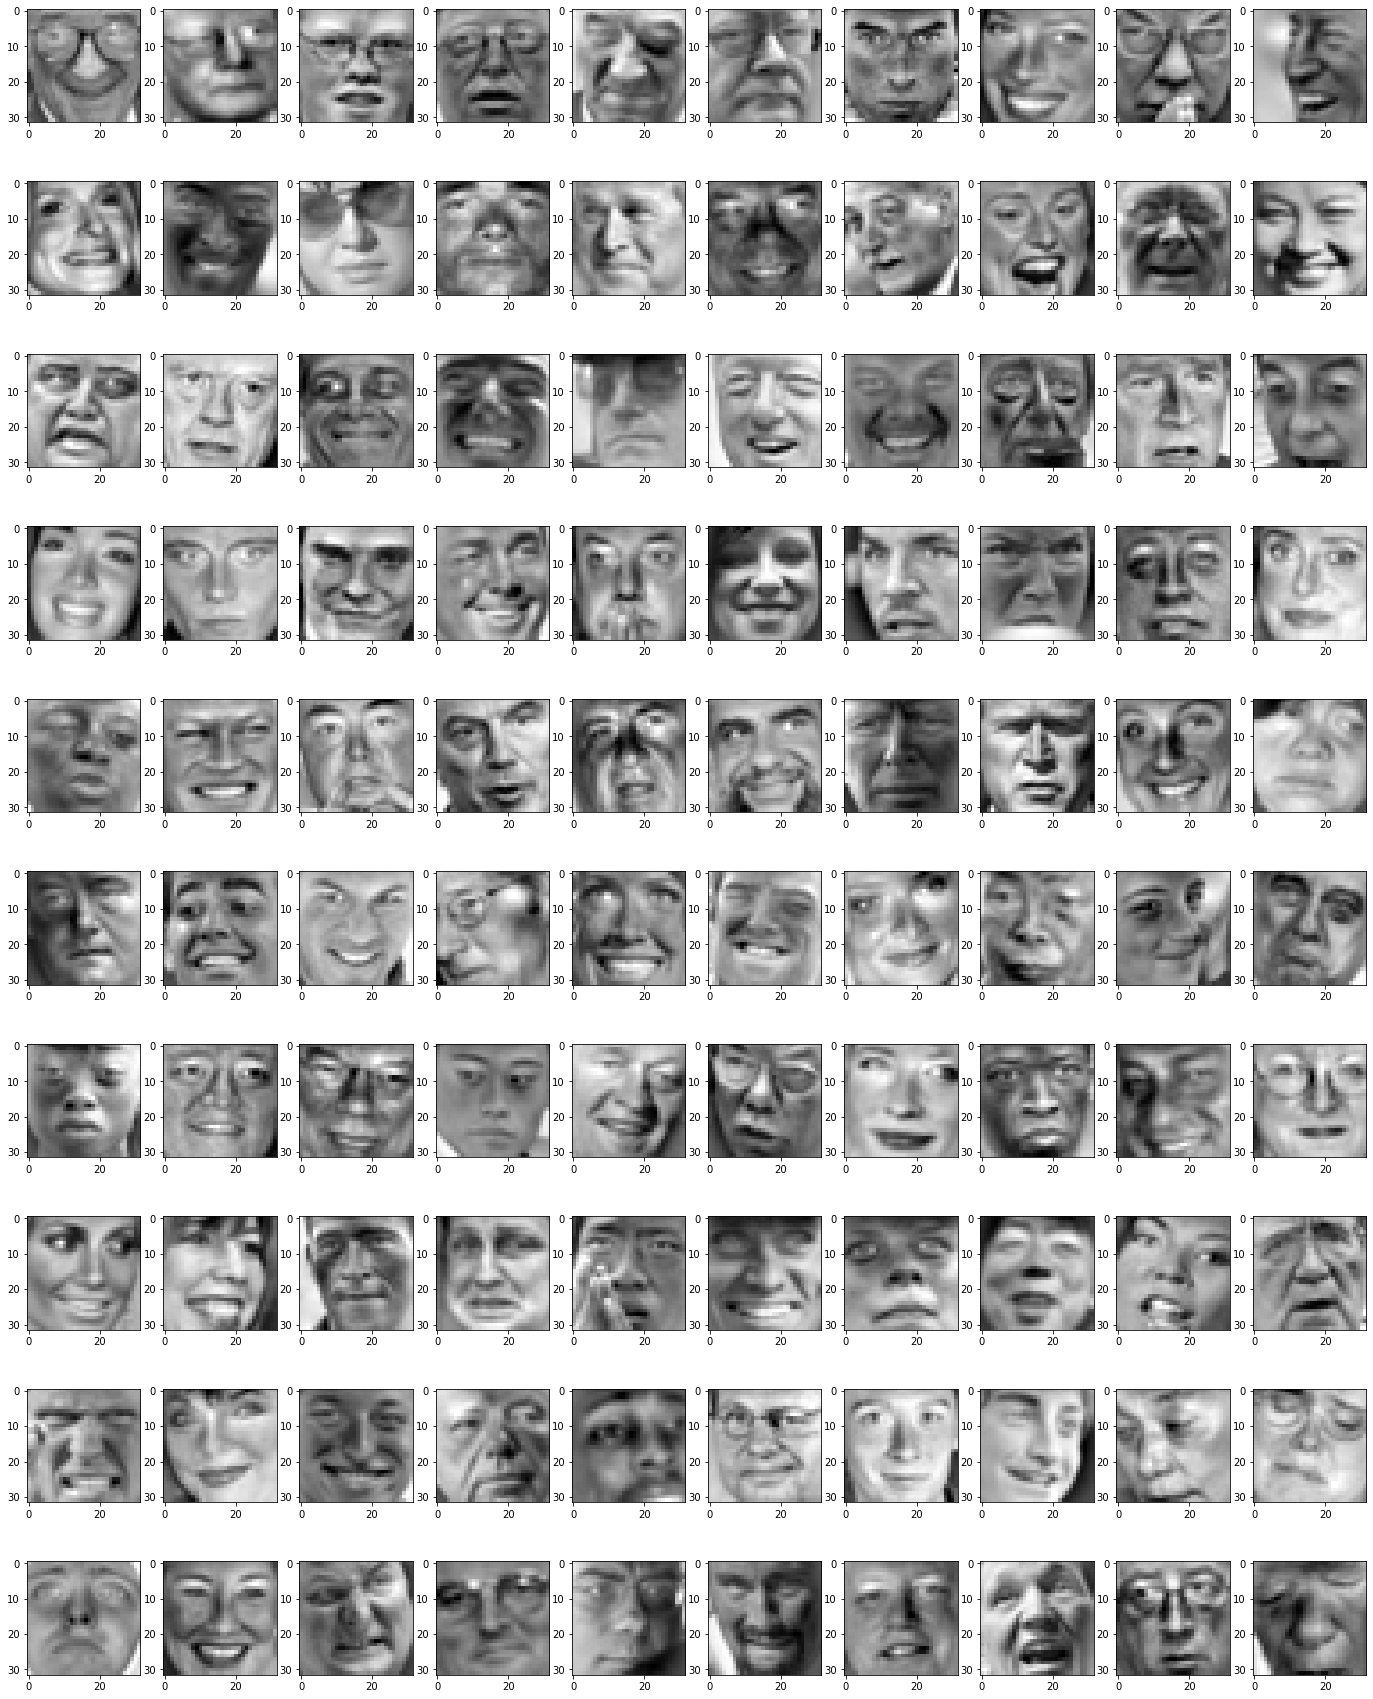

In [6]:
# Plot the scaled Images

print("Scaled Images")

pca=PCA(n_components=100)

plt.figure(figsize=(1 * 24, 1.3 * 24))
for i in range(len(X_scaled[:100])):
    plt.subplot(10, 10, i+1)
    image = X_scaled[i].reshape((32,32), order = 'F')
    plt.imshow(image, cmap = mpl.cm.gist_gray);

Recovered Images


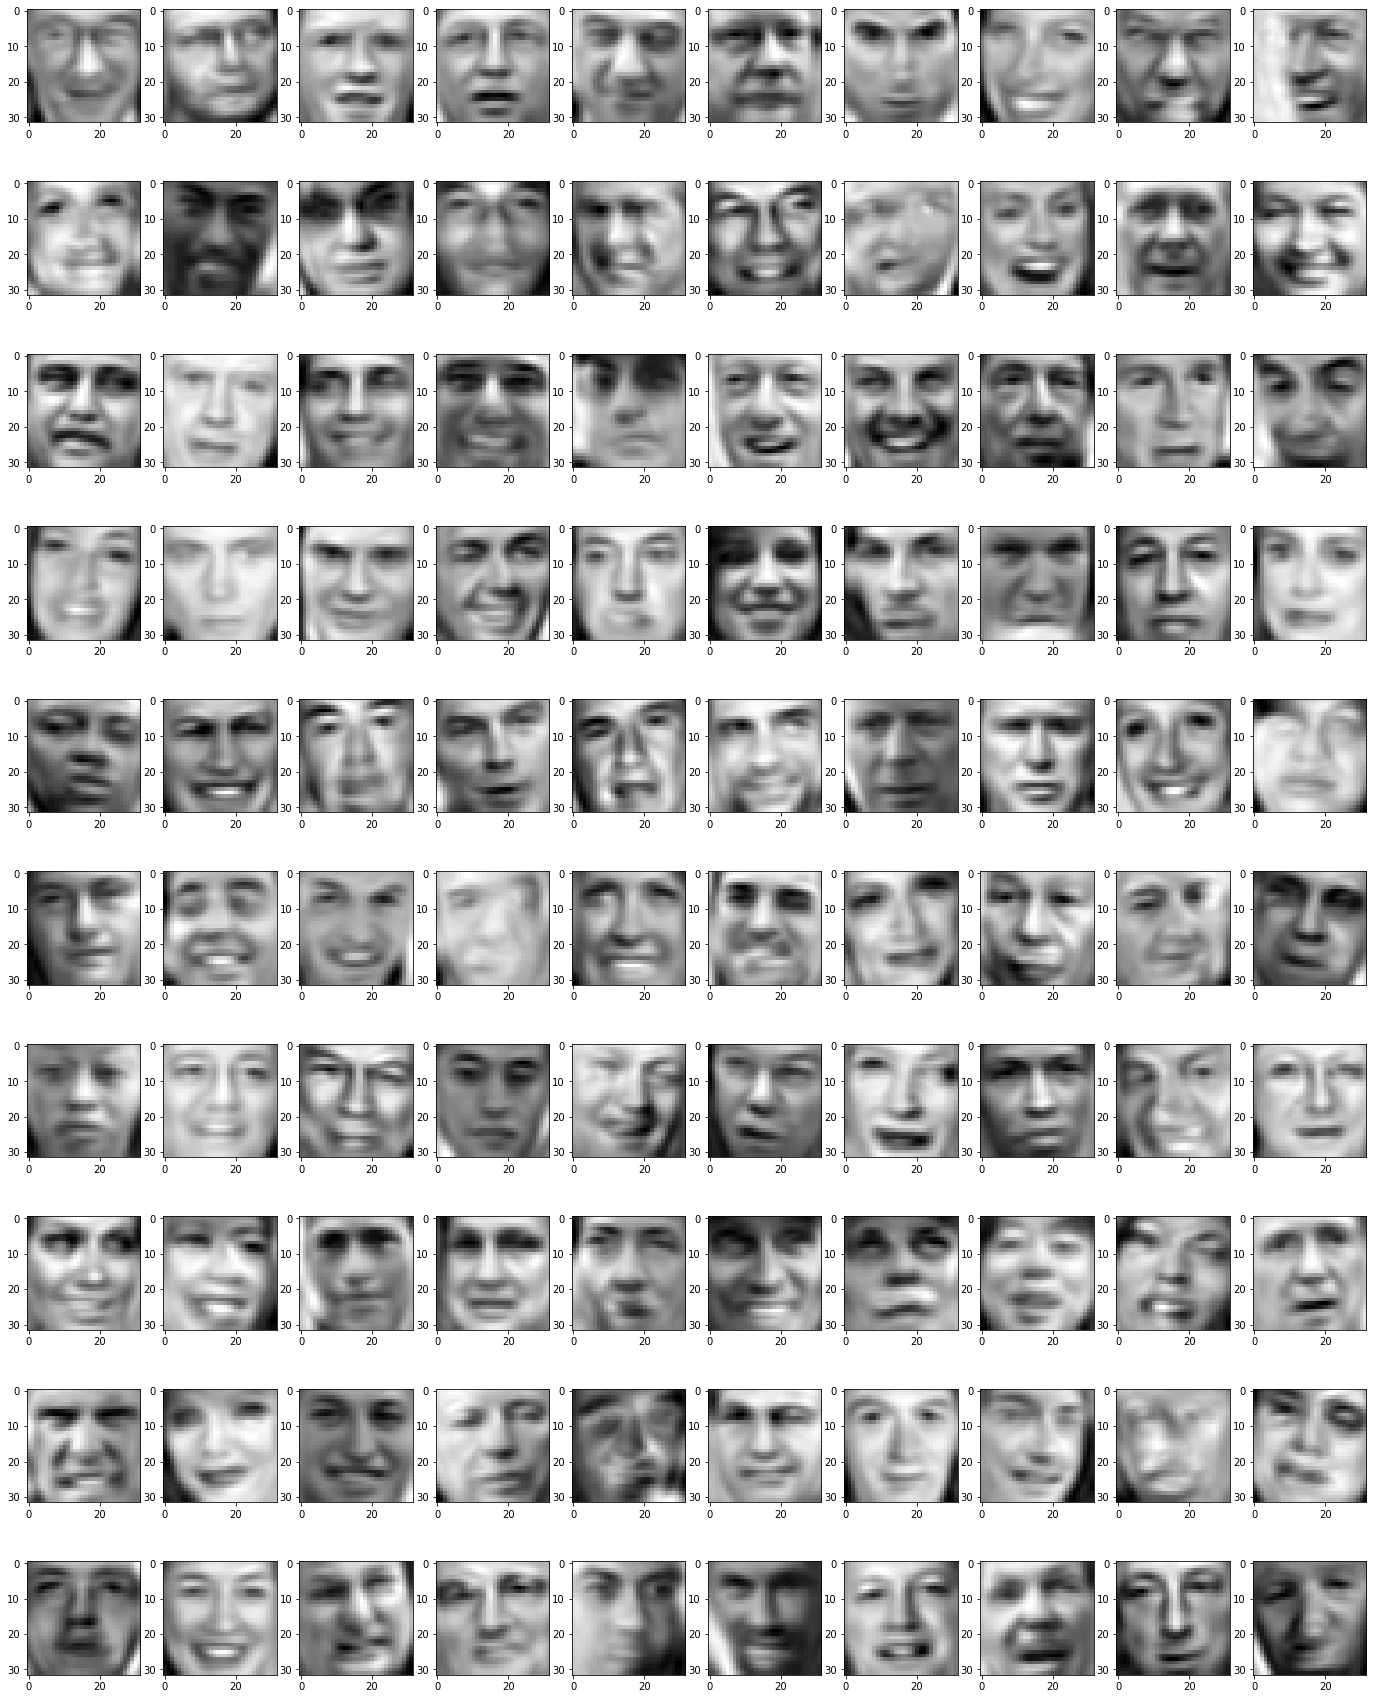

In [7]:
#4


fit_transform_X = pca.fit_transform(data['X'])
inverse_transform_X = pca.inverse_transform(fit_transform_X)

print("Recovered Images")
plt.figure(figsize=(1 * 24, 1.3 * 24))
for i in range(len(inverse_transform_X[:100])):
    plt.subplot(10, 10, i+1)
    image = inverse_transform_X[i].reshape((32,32), order = 'F')
    plt.imshow(image, cmap = mpl.cm.gist_gray);

plt.show()


# Problem 2

Revisit Problem 2 HW 3. Read in the dataset stored in 'HW3P2.txt'. The first two columns represent two features, and the last column is the labels (0 and 1).

(a) Try a Support Vector Machine classifier (sklearn.svm.SVC), with various hyperparameters: kernel="linear", C in the range of 1 and 100 with 50 equidistant points; and kernel="rbf", C in the range of 1 and 100 with 50 equidistant points, and gamma in the range of 0.0001 and 2 with 50 equidistant points. Show the best parameters and best mean test score. In SVC, set random_state to 10.

(b) Make a decision boundary plot with the best parameters from (a)

(c) Use a randomized search to repeat Part (a), but use 1000 randomly chosen parameter combinations

(d) Compare the best mean test scores in (a) and (c). Are they close or very different?

In [8]:
#a 

# Read in the Data
hw3p2_data = pd.read_csv('HW3P2.txt', header = None, sep = " ")



In [9]:
#Feature Matrix
X_1 = hw3p2_data.iloc[:,0:2]

#Create target Vector
y_1 = hw3p2_data.iloc[:, 2]

In [10]:
# Create the labels for label 

label_0_1 = hw3p2_data[hw3p2_data.iloc[:,2]==0]

# Create Labels for label 1

label_1_1 = hw3p2_data[hw3p2_data.iloc[:,2]==1]

In [11]:
svm_classifier = Pipeline([("scaler", StandardScaler()),
                           ("svc", SVC(random_state=10)),])

In [12]:
param_grid = [{'svc__kernel':['linear'],
               'svc__C':np.linspace(1,100,50)},
              {'svc__kernel':['rbf'],
               'svc__C':np.linspace(1,100,50), 
               'svc__gamma':np.linspace(0.0001,2,50)}]

In [13]:
grid_search = GridSearchCV(svm_classifier, param_grid, cv=10,scoring='f1')
grid_search.fit(X_1,y_1)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC(random_state=10))]),
             param_grid=[{'svc__C': array([  1.        ,   3.02040816,   5.04081633,   7.06122449,
         9.08163265,  11.10204082,  13.12244898,  15.14285714,
        17.16326531,  19.18367347,  21.20408163,  23.2244898 ,
        25.24489796,  27.26530612,  29.28571429,  31.30612245,
        33.32653061,  35.34693878,  37.36734694,  39....
       1.14290000e+00, 1.18371429e+00, 1.22452857e+00, 1.26534286e+00,
       1.30615714e+00, 1.34697143e+00, 1.38778571e+00, 1.42860000e+00,
       1.46941429e+00, 1.51022857e+00, 1.55104286e+00, 1.59185714e+00,
       1.63267143e+00, 1.67348571e+00, 1.71430000e+00, 1.75511429e+00,
       1.79592857e+00, 1.83674286e+00, 1.87755714e+00, 1.91837143e+00,
       1.95918571e+00, 2.00000000e+00]),
                          'svc__kernel': ['rbf']}],
             scoring='f1')

In [14]:
print("The best parameters are the following:", grid_search.best_params_)

The best parameters are the following: {'svc__C': 53.53061224489795, 'svc__gamma': 1.1020857142857143, 'svc__kernel': 'rbf'}


In [15]:
print("The best mean test score is the following:", grid_search.cv_results_['mean_test_score'].max())

The best mean test score is the following: 0.93499127527645


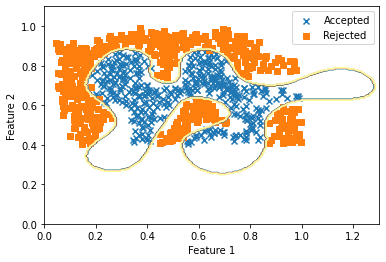

In [16]:
# b 

# Create the model
scaler_rbf = Pipeline([
    ('scaler', StandardScaler()),
    ('rbf', SVC(random_state=10, 
            C = grid_search.best_params_['svc__C'], 
            gamma = grid_search.best_params_['svc__gamma']))])

# Train the model
scaler_rbf.fit(X_1, y_1)

# Plot the Decision Boundary

def plot_decision_boundary(model, label_1_1, label_0_1):
    """
    Plot the decision boundary along with the data for problem 3
    input:
    model: the logistic regression model
    accepted: dataframe of two columns that contains the two test scores for accepted microchips
    rejected: dataframe of two columns that contains the two test scores for rejected microchips
    """
    x_min, x_max = 0, 1.3
    y_min, y_max = 0, 1.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = scaler_rbf.predict((np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, cmap=plt.cm.Paired)
    
    plt.scatter(label_0_1.iloc[:, 0], label_0_1.iloc[:, 1], marker='x')
    plt.scatter(label_1_1.iloc[:, 0], label_1_1.iloc[:, 1], marker='s')
    plt.legend(['Accepted', 'Rejected'])
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')

plot_decision_boundary(scaler_rbf, label_1_1[[0,1]], label_0_1[[0,1]])

In [17]:
# c

svm_c = Pipeline([("scaler", StandardScaler()),
                           ("svc", SVC(random_state=10)),])

param_grid_c = [{'svc__kernel':['linear'],
               'svc__C':uniform(loc = 1, scale = 99)},
              {'svc__kernel':['rbf'],
               'svc__C':uniform(loc = 1, scale = 99), 
               'svc__gamma':uniform(loc = 1, scale = 99)}]



In [18]:
randomized_search = RandomizedSearchCV(svm_c, param_grid_c, cv = 10,scoring = 'f1', n_iter = 1000)
randomized_search.fit(X_1,y_1)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('svc', SVC(random_state=10))]),
                   n_iter=1000,
                   param_distributions=[{'svc__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002410C465B80>,
                                         'svc__kernel': ['linear']},
                                        {'svc__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002410C465190>,
                                         'svc__gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002410DEB7550>,
                                         'svc__kernel': ['rbf']}],
                   scoring='f1')

In [19]:
print("The best parameters are the following:", randomized_search.best_params_)

The best parameters are the following: {'svc__C': 3.859136860713005, 'svc__gamma': 35.22505818159267, 'svc__kernel': 'rbf'}


In [20]:
print("The best mean test score is the following:", randomized_search.cv_results_['mean_test_score'].max())

The best mean test score is the following: 0.945970168352931


In [21]:
# d

# Compare the best mean test scores in (a) and (c). 
# Are they close or very different?

print("Recall that the best mean test score in part (a) is the following:", grid_search.cv_results_['mean_test_score'].max())


print("Recall that the best mean test score in part (c) is the following:", randomized_search.cv_results_['mean_test_score'].max())

Recall that the best mean test score in part (a) is the following: 0.93499127527645
Recall that the best mean test score in part (c) is the following: 0.945970168352931


Thus, from the results we obtained we can see that the best mean test score in part (a) was just a bit better as it is a little bit bigger. The two best mean test scores in (a) and (c) are very close in their values. 